In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import nltk
from urllib.request import urlopen

print(f'NLTK library version= {nltk.__version__}')

NLTK library version= 3.4.5


In [2]:
# urllib is used to download the html content of any web link
response = urlopen('http://python.org/')

# Read the entire content of a file using read() method
html = response.read()
print(len(html))

49889


In [3]:
# Split the long HTML string
tokens = [tok for tok in html.split()]
print(f'Total no of tokens= {len(tokens)}')

# First 100 tokens
print(tokens[0:100])

Total no of tokens= 2913
[b'<!doctype', b'html>', b'<!--[if', b'lt', b'IE', b'7]>', b'<html', b'class="no-js', b'ie6', b'lt-ie7', b'lt-ie8', b'lt-ie9">', b'<![endif]-->', b'<!--[if', b'IE', b'7]>', b'<html', b'class="no-js', b'ie7', b'lt-ie8', b'lt-ie9">', b'<![endif]-->', b'<!--[if', b'IE', b'8]>', b'<html', b'class="no-js', b'ie8', b'lt-ie9">', b'<![endif]-->', b'<!--[if', b'gt', b'IE', b'8]><!--><html', b'class="no-js"', b'lang="en"', b'dir="ltr">', b'<!--<![endif]-->', b'<head>', b'<meta', b'charset="utf-8">', b'<meta', b'http-equiv="X-UA-Compatible"', b'content="IE=edge">', b'<link', b'rel="prefetch"', b'href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">', b'<link', b'rel="prefetch"', b'href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">', b'<meta', b'name="application-name"', b'content="Python.org">', b'<meta', b'name="msapplication-tooltip"', b'content="The', b'official', b'home', b'of', b'the', b'Python', b'Programming', b'Language">', b'<me

In [5]:
type( html )

str

In [4]:
# Now use Regular Expression
import re

# Convert the html byte object to string
html = html.decode('utf-8')

tokens = re.split(r'\W+', html)
print(len(tokens))
print(tokens[0:100])

6327
['', 'doctype', 'html', 'if', 'lt', 'IE', '7', 'html', 'class', 'no', 'js', 'ie6', 'lt', 'ie7', 'lt', 'ie8', 'lt', 'ie9', 'endif', 'if', 'IE', '7', 'html', 'class', 'no', 'js', 'ie7', 'lt', 'ie8', 'lt', 'ie9', 'endif', 'if', 'IE', '8', 'html', 'class', 'no', 'js', 'ie8', 'lt', 'ie9', 'endif', 'if', 'gt', 'IE', '8', 'html', 'class', 'no', 'js', 'lang', 'en', 'dir', 'ltr', 'endif', 'head', 'meta', 'charset', 'utf', '8', 'meta', 'http', 'equiv', 'X', 'UA', 'Compatible', 'content', 'IE', 'edge', 'link', 'rel', 'prefetch', 'href', 'ajax', 'googleapis', 'com', 'ajax', 'libs', 'jquery', '1', '8', '2', 'jquery', 'min', 'js', 'link', 'rel', 'prefetch', 'href', 'ajax', 'googleapis', 'com', 'ajax', 'libs', 'jqueryui', '1', '12', '1', 'jquery']


In [7]:
# Clean the entire string by removing all the html 'noise'
# Use BeautifulSoup module as nltk.clean_html is obsolete now
# First download NLTK module for tokenizer to the environment
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OddyF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from bs4 import BeautifulSoup

raw = BeautifulSoup(html).get_text()
tokens = nltk.word_tokenize(raw)
print(tokens[:100])

['Welcome', 'to', 'Python.org', '{', '``', '@', 'context', "''", ':', '``', 'https', ':', '//schema.org', "''", ',', '``', '@', 'type', "''", ':', '``', 'WebSite', "''", ',', '``', 'url', "''", ':', '``', 'https', ':', '//www.python.org/', "''", ',', '``', 'potentialAction', "''", ':', '{', '``', '@', 'type', "''", ':', '``', 'SearchAction', "''", ',', '``', 'target', "''", ':', '``', 'https', ':', '//www.python.org/search/', '?', 'q=', '{', 'search_term_string', '}', "''", ',', '``', 'query-input', "''", ':', '``', 'required', 'name=search_term_string', "''", '}', '}', 'var', '_gaq', '=', '_gaq', '||', '[', ']', ';', '_gaq.push', '(', '[', "'_setAccount", "'", ',', "'UA-39055973-1", "'", ']', ')', ';', '_gaq.push', '(', '[', "'_trackPageview", "'", ']', ')', ';']


In [9]:
import operator

freq_dis={}
for tok in tokens:
    if tok in freq_dis:
        freq_dis[tok] += 1
    else:
        freq_dis[tok] = 1

# Sort this dictionary on values (i.e. counts)
sorted_freq_dist= sorted(freq_dis.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_freq_dist[:25])

[('>', 77), (',', 70), ('Python', 58), (':', 32), ('(', 31), (')', 31), ("'", 28), ('and', 22), ('.', 21), ("''", 18), ('the', 17), ('to', 15), ('``', 14), ('=', 14), ('is', 14), ('3', 13), ('of', 12), (';', 11), ('for', 11), ('News', 11), ('Events', 11), ('a', 11), ('[', 9), (']', 9), ('with', 9)]


In [10]:
# Frequency distribution
Freq_dist_nltk = nltk.FreqDist(tokens)
print(Freq_dist_nltk, '\n')

for i,(k,v) in enumerate(Freq_dist_nltk.items()):
    print(str(k)+':'+str(v))
    if i > 10:
        break

<FreqDist with 552 samples and 1450 outcomes> 

Welcome:1
to:15
Python.org:1
{:4
``:14
@:3
context:1
'':18
::32
https:3
//schema.org:1
,:70


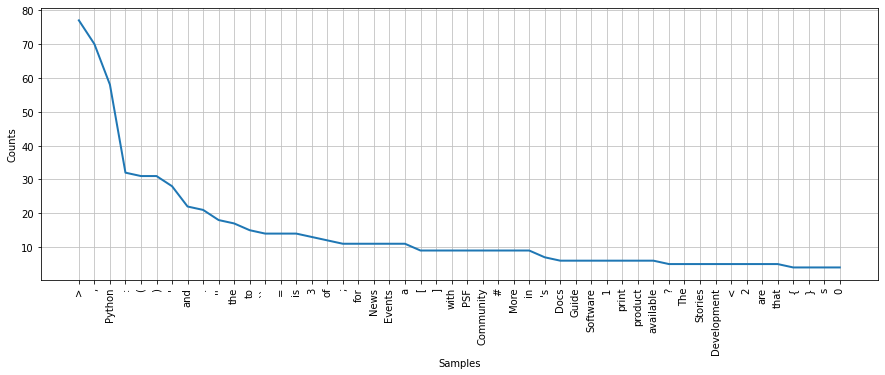

In [11]:
# Plot
plt.figure(figsize=(15, 5))
Freq_dist_nltk.plot(50, cumulative=False) ;

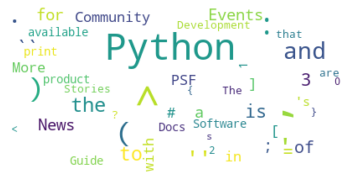

In [13]:
import wordcloud as wc

freq = {a:b for a, b in Freq_dist_nltk.most_common(50)}
wordcloud = wc.WordCloud(max_font_size=50, background_color="white").fit_words(freq)

plt.imshow(wordcloud, interpolation="bilinear"); plt.axis("off"); plt.show()

In [14]:
# Download NLTK stopwords to the environment
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OddyF\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

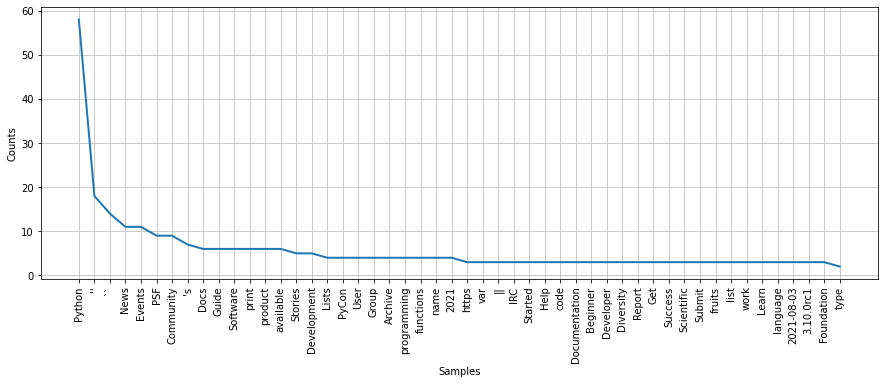

In [15]:
# Clean the stop words
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
clean_tokens = [tok for tok in tokens if len(tok.lower())>1 and (tok.lower() not in stop_words)]
Freq_dist_nltk = nltk.FreqDist(clean_tokens)

plt.figure(figsize=(15, 5))
Freq_dist_nltk.plot(50, cumulative=False);

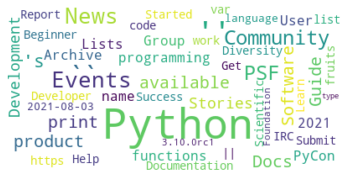

In [16]:
wordcloud = wc.WordCloud(max_font_size=50, background_color="white").fit_words(
    {a:b for a, b in Freq_dist_nltk.most_common(50)})

plt.imshow(wordcloud, interpolation="bilinear"); plt.axis("off"); plt.show()

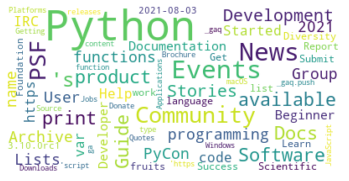

In [17]:
# Remove symbols and digits
freq = {a:b for a, b in Freq_dist_nltk.most_common(70) if re.search(r'[\w]+', a) is not None}
wordcloud = wc.WordCloud(max_font_size=50, background_color="white").fit_words(freq)

plt.imshow(wordcloud, interpolation="bilinear"); plt.axis("off"); plt.show()

In [19]:
# Parse a CSV file
import csv

# First 20 movie reviews, first 70 characters each and class
with open('movie_data.csv','r') as f:
    reader = csv.reader(f, delimiter=',', quotechar='"')
    for i, line in enumerate(reader):
        print(line[0][:70], line[1])
        if i == 20:
            break

review sentiment
In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-c 1
OK... so... I really like Kris Kristofferson and his usual easy going  0
***SPOILER*** Do not read this, if you think about watching that movie 0
hi for all the people who have seen this wonderful movie im sure thet  1
I recently bought the DVD, forgetting just how much I hated the movie  0
Leave it to Braik to put on a good show. Finally he and Zorak are livi 1
Nathan Detroit (Frank Sinatra) is the manager of the New York's longes 1
To understand "Crash Course" in the right context, you must understand 1
I've been impressed with Chavez's stance against globalisation for som 1
This movie is directed by Renny Harlin the finnish miracle. Stallone i 1
I once lived in the u.p and let me tell you what. I didn't have the fo 0
Hidden Frontier is notable for being the longest running internet-base 1
It's a while ago, that I have seen Sleuth (1972) with two great actors 0
What is it about the French? First

In [20]:
# Parse JSON
import json

with open('winemag-data-130k-v2.json') as jsonfile:
    data = json.load(jsonfile)
    print(len(data), '\n')
    print(data[0], '\n')
    print(data[10], '\n')
    print(data[10]['title'], data[10]['points'])

129971 

{'points': '87', 'title': 'Nicosia 2013 Vulkà Bianco  (Etna)', 'description': "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.", 'taster_name': 'Kerin O’Keefe', 'taster_twitter_handle': '@kerinokeefe', 'price': None, 'designation': 'Vulkà Bianco', 'variety': 'White Blend', 'region_1': 'Etna', 'region_2': None, 'province': 'Sicily & Sardinia', 'country': 'Italy', 'winery': 'Nicosia'} 

{'points': '87', 'title': 'Kirkland Signature 2011 Mountain Cuvée Cabernet Sauvignon (Napa Valley)', 'description': 'Soft, supple plum envelopes an oaky structure in this Cabernet, supported by 15% Merlot. Coffee and chocolate complete the picture, finishing strong at the end, resulting in a value-priced wine of attractive flavor and immediate accessibility.', 'taster_name': 'Virginie Boone', 'taster_twitter_handle': '@vboone', 'price': 19, 'designation': 'Mountain Cuvée', 

In [21]:
import pandas as pd

df = pd.read_json('winemag-data-130k-v2.json', lines=False)
df.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


In [22]:
# Sentence splitter
inputstring = '    This is an example sentence. The sentence splitter will split on sentence markers. Yes!  '

from nltk.tokenize import sent_tokenize

all_sent = sent_tokenize(inputstring)
print(all_sent)

['    This is an example sentence.', 'The sentence splitter will split on sentence markers.', 'Yes!']


In [23]:
# Tokenization
import nltk.tokenize.punkt

tokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()  # Already built-in trained
train_text = ''
with open('2005-GWBush.txt', 'r') as fin:
    train_text += str(fin.readlines())  # Why are we concatenating?
    
tokens = tokenizer.tokenize(train_text)
print(tokens[:10])

['["PRESIDENT GEORGE W. BUSH\'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION\\n", \' \\n\', \'February 2, 2005\\n\', \'\\n\', \'\\n\', \'9:10 P.M.', "EST \\n', '\\n', 'THE PRESIDENT: Mr.", 'Speaker, Vice President Cheney, members of Congress, fellow citizens: \\n\', \'\\n\', "As a new Congress gathers, all of us in the elected branches of government share a great privilege: We\'ve been placed in office by the votes of the people we serve.', 'And tonight that is a privilege we share with newly-elected leaders of Afghanistan, the Palestinian Territories, Ukraine, and a free and sovereign Iraq.', '(Applause.)', '\\n", \'\\n\', \'Two weeks ago, I stood on the steps of this Capitol and renewed the commitment of our nation to the guiding ideal of liberty for all.', 'This evening I will set forth policies to advance that ideal at home and around the world.', "\\n', '\\n', 'Tonight, with a healthy, growing economy, with more Americans going back to work, with our na

In [24]:
# More on tokenization
s = "Hi Everyone ! hola gr8"  

print(s.split())  # simplest tokenizer

from nltk.tokenize import word_tokenize
print(word_tokenize(s))

from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize
print(regexp_tokenize(s, pattern='\w+'))

print(regexp_tokenize(s, pattern='\d+'))

print(wordpunct_tokenize(s))

print(blankline_tokenize(s))

['Hi', 'Everyone', '!', 'hola', 'gr8']
['Hi', 'Everyone', '!', 'hola', 'gr8']
['Hi', 'Everyone', 'hola', 'gr8']
['8']
['Hi', 'Everyone', '!', 'hola', 'gr8']
['Hi Everyone ! hola gr8']


In [25]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

print(PorterStemmer().stem("shopping"))

print(LancasterStemmer().stem("eating"))

print(SnowballStemmer('english').stem("shopping"))
print(SnowballStemmer('english').stem("manger"))
print(SnowballStemmer('french').stem("manger"))

shop
eat
shop
manger
mang


# Exercise 1
 Improve the regular expression for the Python web site word cloud. For example remove the contraction (i.e. 's) from the list.

In [ ]:
# urllib is used to download the html content of any web link
response = urlopen('http://python.org/')

# Read the entire content of a file using read() method
html = response.read()



In [26]:
def remove_contraction_apostraphes(input):
    text = re.sub('([A-Za-z]+)[\'`]([A-Za-z]+)', r'\1'r'\2', input)                                       
    return text

print(remove_contraction_apostraphes("can't"))

cant


# Exercise 2
Plot a frequency distribution of the words from 2005 Bush presidential address (i.e. dataset 2005-GWBush.txt').

In [34]:
soup = BeautifulSoup(open("2005-GWBush.txt").read())
soup_str = str( soup )

In [36]:
tokens = nltk.word_tokenize(soup_str)

In [38]:
freq_dis={}
for tok in tokens:
    if tok in freq_dis:
        freq_dis[tok] += 1
    else:
        freq_dis[tok] = 1

# Sort this dictionary on values (i.e. counts)
sorted_freq_dist= sorted(freq_dis.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_freq_dist[:25])

[(',', 322), ('.', 298), ('the', 233), ('and', 203), ('of', 166), ('to', 159), ('a', 86), ('in', 84), ('that', 70), ('is', 69), ('(', 68), (')', 68), ('our', 67), ('we', 64), ('Applause', 63), ('will', 59), ('for', 54), ('are', 48), ('--', 47), ('have', 37), ('on', 35), ('with', 34), ('I', 34), ('We', 29), ('must', 29)]


In [39]:
# Frequency distribution
Freq_dist_nltk = nltk.FreqDist(tokens)
print(Freq_dist_nltk, '\n')

for i,(k,v) in enumerate(Freq_dist_nltk.items()):
    print(str(k)+':'+str(v))
    if i > 10:
        break

<FreqDist with 1581 samples and 6036 outcomes> 

<:6
html:1
>:6
body:2
p:1
PRESIDENT:2
GEORGE:1
W.:1
BUSH:1
'S:1
ADDRESS:1
BEFORE:1


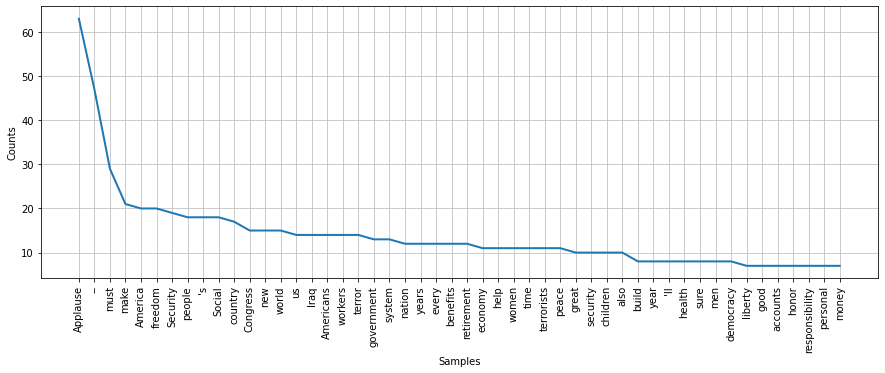

In [41]:
stop_words = set(stopwords.words('english')) 
clean_tokens = [tok for tok in tokens if len(tok.lower())>1 and (tok.lower() not in stop_words)]
Freq_dist_nltk = nltk.FreqDist(clean_tokens)

plt.figure(figsize=(15, 5))
Freq_dist_nltk.plot(50, cumulative=False);